In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

# 1. 코로나 확진자 수 데이터 전처리

In [82]:
co=pd.read_csv("C:\\sm\\mid_project\\data\\covid19_sido.csv")
co=co[["gubun","stdDay","incDec"]]
co=co[co["gubun"]=="합계"]
co=co.reset_index(drop=True)

In [83]:
# 월별 파생변수 추가
month=[]

for i in co["stdDay"]:
    p=re.compile("[0-9]+")
    month.append(p.findall(i)[1])

co["month"]=month

# month 컬럼 데이터 통일시키기
# month 데이터를 보면 3 또는 03 이런식으로 되어 있는 것이 있음
m=[]
for i in month:
    if (i=="3")|(i=="4")|(i=="5")|(i=="6"):
        m.append("0"+i)
    else:
        m.append(i)
co["month"]=m

# 연도 파생변수 추가
co["year"]=co["stdDay"].str[:4]

# 일별 파생변수 추가
day=[]

for i in co["stdDay"]:
    p=re.compile("[0-9]+")
    day.append(p.findall(i)[2])
    
# day 컬럼 데이터 통일시키기
# day 데이터를 보면 3 또는 03 이런식으로 되어 있는 것이 있음
d=[]
for i in day:
    if (i=="1")|(i=="9")|(i=="5")|(i=="8")|(i=="7")|(i=="6")|(i=="4"):
        d.append("0"+i)
    else:
        d.append(i)
co["day"]=d

# 필요한 연도만 분리
co20=co[co["year"]=="2020"]
co21=co[co["year"]=="2021"]

## (1) 20년, 21년도 분리한 데이터 각각 전처리

### 1) 20년도 데이터

In [84]:
# 한달이 30또는 31일인데 그 이상의 데이터 발견
co20["month"].value_counts()

04    38
12    37
10    33
09    32
08    32
11    31
07    31
06    31
05    31
03    29
Name: month, dtype: int64

In [85]:
# 중복된 데이터 처리 필요
co20=co20.drop_duplicates(['stdDay'])

In [86]:
# 제거가 안된 데이터 아직 존재
co20["month"].value_counts()

04    32
12    31
10    31
08    31
07    31
05    31
11    30
09    30
06    30
03    29
Name: month, dtype: int64

In [87]:
# 확인해서 직접 삭제
co20.drop([co20.index[266],co20.index[267]],inplace=True)

In [88]:
co20=co20[["year","month","day","incDec"]]
co20.columns=["year","month","day","covid"]

In [89]:
#### 추가
co20=co20.reset_index(drop=True)

In [90]:
# 없는 날짜 값을 0으로 해서 생성 
new_row = pd.DataFrame([["2020","03","03",0],["2020","03","02",0]], columns = co20.columns)

co20 = pd.concat([co20.iloc[:303], new_row, co20.iloc[303:]], ignore_index = True)

co20

,year,month,day,covid
0,2020,12,31,967.0
1,2020,12,30,1050.0
2,2020,12,29,1046.0
3,2020,12,28,808.0
4,2020,12,27,970.0
...,...,...,...,...
301,2020,03,05,438.0
302,2020,03,04,516.0
303,2020,03,03,0.0
304,2020,03,02,0.0


In [107]:
co20=co20.sort_values(by=["month","day"])

In [124]:
co20=co20.reset_index(drop=True)

In [125]:
co20

,year,month,day,covid
0,2020,03,01,586.0
1,2020,03,02,0.0
2,2020,03,03,0.0
3,2020,03,04,516.0
4,2020,03,05,438.0
...,...,...,...,...
301,2020,12,27,970.0
302,2020,12,28,808.0
303,2020,12,29,1046.0
304,2020,12,30,1050.0


### 2) 21년도 데이터

In [91]:
# 한달이 30또는 31일인데 그 이상의 데이터 발견
co21["month"].value_counts()

08    32
07    32
04    32
01    32
12    31
11    31
10    31
05    31
03    31
09    30
06    30
02    29
Name: month, dtype: int64

In [92]:
# 중복된 데이터 처리 필요
co21=co21.drop_duplicates(['stdDay'])

In [93]:
# 제거 됐는지 확인
co21["month"].value_counts()

12    31
10    31
08    31
05    31
03    31
01    31
11    30
09    30
07    30
06    30
04    30
02    28
Name: month, dtype: int64

In [94]:
co21=co21[["year","month","day","incDec"]]
co21.columns=["year","month","day","covid"]

In [95]:
co21=co21.reset_index(drop=True)
co21

,year,month,day,covid
0,2021,12,31,4875.0
1,2021,12,30,5037.0
2,2021,12,29,5409.0
3,2021,12,28,3865.0
4,2021,12,27,4207.0
...,...,...,...,...
359,2021,01,05,715.0
360,2021,01,04,1020.0
361,2021,01,03,657.0
362,2021,01,02,824.0


In [96]:
co21[co21["month"]=="07"]

,year,month,day,covid
153,2021,07,31,1539.0
154,2021,07,30,1710.0
155,2021,07,29,1674.0
156,2021,07,28,1896.0
157,2021,07,27,1365.0
158,2021,07,26,1318.0
159,2021,07,25,1487.0
160,2021,07,24,1629.0
161,2021,07,23,1630.0
162,2021,07,22,1842.0


In [97]:
# 없는 날짜 값을 0으로 해서 생성 
new_row2 = pd.DataFrame([["2021","07","11",570]], columns = co21.columns)

co21 = pd.concat([co21.iloc[:173], new_row2, co21.iloc[173:]], ignore_index = True)

co21

,year,month,day,covid
0,2021,12,31,4875.0
1,2021,12,30,5037.0
2,2021,12,29,5409.0
3,2021,12,28,3865.0
4,2021,12,27,4207.0
...,...,...,...,...
360,2021,01,05,715.0
361,2021,01,04,1020.0
362,2021,01,03,657.0
363,2021,01,02,824.0


In [80]:
co21[co21["month"]=="07"]

,year,month,day,covid
153,2021,07,31,1539.0
154,2021,07,30,1710.0
155,2021,07,29,1674.0
156,2021,07,28,1896.0
157,2021,07,27,1365.0
158,2021,07,26,1318.0
159,2021,07,25,1487.0
160,2021,07,24,1629.0
161,2021,07,23,1630.0
162,2021,07,22,1842.0


In [108]:
co21=co21.sort_values(by=["month","day"])

In [126]:
co21=co21.reset_index(drop=True)
co21

,year,month,day,covid
0,2021,01,01,1029.0
1,2021,01,02,824.0
2,2021,01,03,657.0
3,2021,01,04,1020.0
4,2021,01,05,715.0
...,...,...,...,...
360,2021,12,27,4207.0
361,2021,12,28,3865.0
362,2021,12,29,5409.0
363,2021,12,30,5037.0


### 3) 데이터 합치기

In [253]:
cov=pd.concat([co20,co21])
cov=cov.reset_index(drop=True)
cov

,year,month,day,covid
0,2020,03,01,586.0
1,2020,03,02,0.0
2,2020,03,03,0.0
3,2020,03,04,516.0
4,2020,03,05,438.0
...,...,...,...,...
666,2021,12,27,4207.0
667,2021,12,28,3865.0
668,2021,12,29,5409.0
669,2021,12,30,5037.0


In [255]:
mov

,mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,...,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21
0,1.000000,0.185313,0.508517,0.003164,0.089564,0.563240,0.085577,0.890452,0.732655,0.181045,...,0.571623,0.180340,0.378985,0.025885,0.057895,0.760105,0.499709,0.178324,0.000000,0.112740
1,0.357698,0.132279,0.558979,0.000000,0.069319,0.462712,0.109842,1.000000,0.111890,0.174584,...,0.018485,0.201622,0.278602,0.028444,0.163601,0.313226,0.301161,0.523235,0.003565,0.086925
2,0.325735,0.112110,0.561208,0.002529,0.088146,0.198916,0.099966,0.938846,0.093719,0.241477,...,0.164963,1.000000,0.050131,0.189398,0.491577,0.293753,0.352929,0.582856,0.499996,0.093781
3,0.339360,0.297172,0.278248,0.148887,0.284221,0.198575,0.143513,0.685983,0.322933,0.194641,...,0.174701,0.819903,0.096011,0.284419,0.445416,0.324832,1.000000,0.440903,0.277153,0.241061
4,0.379131,0.241669,1.000000,0.150563,0.232206,0.587063,0.407481,0.100775,0.278157,0.405208,...,0.209980,0.027649,0.651715,1.000000,0.000000,0.258247,0.906529,0.023053,0.383578,0.206098
5,0.408628,0.003234,0.095221,0.362049,0.015590,0.485059,0.343264,0.067491,0.387666,0.371595,...,0.860612,0.012349,0.059279,0.855233,0.037088,0.223375,0.168150,0.062133,1.000000,0.021265
6,0.934084,0.000000,0.075749,0.324706,0.012686,0.540476,0.051336,0.089927,1.000000,0.044352,...,0.820842,0.118270,0.076946,0.079143,0.375875,0.636431,0.117664,0.034317,0.850177,0.019985
7,0.771373,0.035017,0.051455,0.049834,0.036878,1.000000,0.046965,0.100070,0.901014,0.026024,...,0.073488,0.092002,0.174398,0.034458,0.302648,0.607837,0.138760,0.075988,0.120624,0.042152
8,0.245099,0.033706,0.621853,0.041505,0.029420,0.888354,0.078348,0.394612,0.151165,0.050278,...,0.058489,0.141109,0.195324,0.106394,0.360365,0.092996,0.158557,0.328251,0.085800,0.050279
9,0.243299,0.038929,0.496293,0.124035,0.043649,0.308665,0.099004,0.355164,0.142036,0.242881,...,0.072995,0.540662,0.011444,0.074014,1.000000,0.078984,0.168554,0.394390,0.194178,0.048560


<AxesSubplot:>

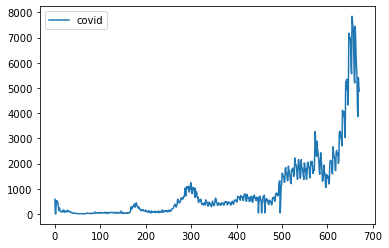

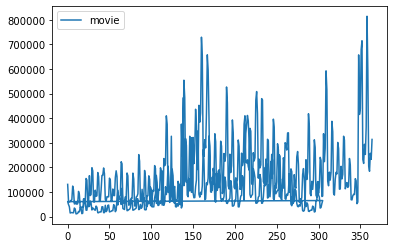

In [260]:
cov.plot()
mov.plot()

# 2. 영화 관객수

## (1) 20년도 자료 전처리

In [17]:
m2020_03 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_03.xlsx",header=[4,5])
m2020_03 = m2020_03[:-1]

m2020_04 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_04.xlsx",header=[4,5])
m2020_04 = m2020_04[:-1]

m2020_05 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_05.xlsx",header=[4,5])
m2020_05 = m2020_05[:-1]

m2020_06 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_06.xlsx",header=[4,5])
m2020_06 = m2020_06[:-1]

m2020_07 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_07.xlsx",header=[4,5])
m2020_07 = m2020_07[:-1]

m2020_08 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_08.xlsx",header=[4,5])
m2020_08 = m2020_08[:-1]

m2020_09 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_09.xlsx",header=[4,5])
m2020_09 = m2020_09[:-1]

m2020_10 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_10.xlsx",header=[4,5])
m2020_10 = m2020_10[:-1]

m2020_11 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_11.xlsx",header=[4,5])
m2020_11 = m2020_11[:-1]

m2020_12 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_12.xlsx",header=[4,5])
m2020_12 = m2020_12[:-1]

In [18]:
# 날짜형 문자형으로 바꿔주기

m2020_03["연도","Unnamed: 0_level_1"]= m2020_03["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_03["연도","Unnamed: 0_level_1"] = m2020_03["연도","Unnamed: 0_level_1"].astype(str)

m2020_04["연도","Unnamed: 0_level_1"]= m2020_04["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_04["연도","Unnamed: 0_level_1"] = m2020_04["연도","Unnamed: 0_level_1"].astype(str)

m2020_05["연도","Unnamed: 0_level_1"]= m2020_05["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_05["연도","Unnamed: 0_level_1"] = m2020_05["연도","Unnamed: 0_level_1"].astype(str)

m2020_06["연도","Unnamed: 0_level_1"]= m2020_06["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_06["연도","Unnamed: 0_level_1"] = m2020_06["연도","Unnamed: 0_level_1"].astype(str)

m2020_07["연도","Unnamed: 0_level_1"]= m2020_07["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_07["연도","Unnamed: 0_level_1"] = m2020_07["연도","Unnamed: 0_level_1"].astype(str)

m2020_08["연도","Unnamed: 0_level_1"]= m2020_08["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_08["연도","Unnamed: 0_level_1"] = m2020_08["연도","Unnamed: 0_level_1"].astype(str)

m2020_09["연도","Unnamed: 0_level_1"]= m2020_09["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_09["연도","Unnamed: 0_level_1"] = m2020_09["연도","Unnamed: 0_level_1"].astype(str)

m2020_10["연도","Unnamed: 0_level_1"]= m2020_10["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_10["연도","Unnamed: 0_level_1"] = m2020_10["연도","Unnamed: 0_level_1"].astype(str)

m2020_11["연도","Unnamed: 0_level_1"]= m2020_11["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_11["연도","Unnamed: 0_level_1"] = m2020_11["연도","Unnamed: 0_level_1"].astype(str)

m2020_12["연도","Unnamed: 0_level_1"]= m2020_12["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_12["연도","Unnamed: 0_level_1"] = m2020_12["연도","Unnamed: 0_level_1"].astype(str)

In [19]:
# 월만 추출

m20_03=[]
for i in m2020_03["연도","Unnamed: 0_level_1"]:
    m20_03.append(i[4:6])
    
m20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    m20_04.append(i[4:6])
    
m20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    m20_05.append(i[4:6])

m20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    m20_06.append(i[4:6])
    
m20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    m20_07.append(i[4:6])
    
m20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    m20_08.append(i[4:6])

m20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    m20_09.append(i[4:6])
    
m20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    m20_10.append(i[4:6])
    
m20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    m20_11.append(i[4:6])

m20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    m20_12.append(i[4:6])

In [20]:
# 연도만 추출

y20_03=[]
for i in m2020_03["연도","Unnamed: 0_level_1"]:
    y20_03.append(i[:4])
    
y20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    y20_04.append(i[:4])
    
y20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    y20_05.append(i[:4])
    
y20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    y20_06.append(i[:4])
    
y20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    y20_07.append(i[:4])
    
y20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    y20_08.append(i[:4])
    
y20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    y20_09.append(i[:4])

y20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    y20_10.append(i[:4])
    
y20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    y20_11.append(i[:4])
    
y20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    y20_12.append(i[:4])

In [21]:
# 일만 추출

d20_03=[]
for i in m2020_03["연도","Unnamed: 0_level_1"]:
    d20_03.append(i[6:8])
    
d20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    d20_04.append(i[6:8])
    
d20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    d20_05.append(i[6:8])
    
d20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    d20_06.append(i[6:8])
    
d20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    d20_07.append(i[6:8])
    
d20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    d20_08.append(i[6:8])
    
d20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    d20_09.append(i[6:8])

d20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    d20_10.append(i[6:8])
    
d20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    d20_11.append(i[6:8])
    
d20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    d20_12.append(i[6:8])

In [22]:
# 월 파생변수 생성
m2020_03["전체","month"]=m20_03
m2020_04["전체","month"]=m20_04
m2020_05["전체","month"]=m20_05
m2020_06["전체","month"]=m20_06
m2020_07["전체","month"]=m20_07
m2020_08["전체","month"]=m20_08
m2020_09["전체","month"]=m20_09
m2020_10["전체","month"]=m20_10
m2020_11["전체","month"]=m20_11
m2020_12["전체","month"]=m20_12

# 월 파생변수 생성
m2020_03["전체","year"]=y20_03
m2020_04["전체","year"]=y20_04
m2020_05["전체","year"]=y20_05
m2020_06["전체","year"]=y20_06
m2020_07["전체","year"]=y20_07
m2020_08["전체","year"]=y20_08
m2020_09["전체","year"]=y20_09
m2020_10["전체","year"]=y20_10
m2020_11["전체","year"]=y20_11
m2020_12["전체","year"]=y20_12

# 일 파생변수 생성
m2020_03["전체","day"]=d20_03
m2020_04["전체","day"]=d20_04
m2020_05["전체","day"]=d20_05
m2020_06["전체","day"]=d20_06
m2020_07["전체","day"]=d20_07
m2020_08["전체","day"]=d20_08
m2020_09["전체","day"]=d20_09
m2020_10["전체","day"]=d20_10
m2020_11["전체","day"]=d20_11
m2020_12["전체","day"]=d20_12

# 전체만 추출
m2020_03=m2020_03["전체"]
m2020_04=m2020_04["전체"]
m2020_05=m2020_05["전체"]
m2020_06=m2020_06["전체"]
m2020_07=m2020_07["전체"]
m2020_08=m2020_08["전체"]
m2020_09=m2020_09["전체"]
m2020_10=m2020_10["전체"]
m2020_11=m2020_11["전체"]
m2020_12=m2020_12["전체"]


# 필요한 컬럼 추출
m2020_03=m2020_03[["year","month","day","관객수"]]
m2020_04=m2020_04[["year","month","day","관객수"]]
m2020_05=m2020_05[["year","month","day","관객수"]]
m2020_06=m2020_06[["year","month","day","관객수"]]
m2020_07=m2020_07[["year","month","day","관객수"]]
m2020_08=m2020_08[["year","month","day","관객수"]]
m2020_09=m2020_09[["year","month","day","관객수"]]
m2020_10=m2020_10[["year","month","day","관객수"]]
m2020_11=m2020_11[["year","month","day","관객수"]]
m2020_12=m2020_12[["year","month","day","관객수"]]

In [23]:
mov20=pd.concat([m2020_03,m2020_04,m2020_05,m2020_06,m2020_07,m2020_08,m2020_09,m2020_10,m2020_11,m2020_12],ignore_index=True)
mov20.columns=["year","month","day","movie"]

In [24]:
mov20

,year,month,day,movie
0,2020,03,01,130900
1,2020,03,02,63441
2,2020,03,03,60084
3,2020,03,04,61515
4,2020,03,05,65692
...,...,...,...,...
301,2020,12,27,79216
302,2020,12,28,34456
303,2020,12,29,36828
304,2020,12,30,52810


## (2) 21년도 자료 전처리

In [25]:
m2021_01 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_01.xlsx",header=[4,5])
m2021_01 = m2021_01[:-1]

m2021_02 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_02.xlsx",header=[4,5])
m2021_02 = m2021_02[:-1]

m2021_03 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_03.xlsx",header=[4,5])
m2021_03 = m2021_03[:-1]

m2021_04 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_04.xlsx",header=[4,5])
m2021_04 = m2021_04[:-1]

m2021_05 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_05.xlsx",header=[4,5])
m2021_05 = m2021_05[:-1]

m2021_06 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_06.xlsx",header=[4,5])
m2021_06 = m2021_06[:-1]

m2021_07 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_07.xlsx",header=[4,5])
m2021_07 = m2021_07[:-1]

m2021_08 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_08.xlsx",header=[4,5])
m2021_08 = m2021_08[:-1]

m2021_09 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_09.xlsx",header=[4,5])
m2021_09 = m2021_09[:-1]

m2021_10 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_10.xlsx",header=[4,5])
m2021_10 = m2021_10[:-1]

m2021_11 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_11.xlsx",header=[4,5])
m2021_11 = m2021_11[:-1]

m2021_12 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_12.xlsx",header=[4,5])
m2021_12 = m2021_12[:-1]

In [26]:
# 날짜형 문자형으로 바꿔주기

m2021_01["연도","Unnamed: 0_level_1"]= m2021_01["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_01["연도","Unnamed: 0_level_1"] = m2021_01["연도","Unnamed: 0_level_1"].astype(str)

m2021_02["연도","Unnamed: 0_level_1"]= m2021_02["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_02["연도","Unnamed: 0_level_1"] = m2021_02["연도","Unnamed: 0_level_1"].astype(str)

m2021_03["연도","Unnamed: 0_level_1"]= m2021_03["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_03["연도","Unnamed: 0_level_1"] = m2021_03["연도","Unnamed: 0_level_1"].astype(str)

m2021_04["연도","Unnamed: 0_level_1"]= m2021_04["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_04["연도","Unnamed: 0_level_1"] = m2021_04["연도","Unnamed: 0_level_1"].astype(str)

m2021_05["연도","Unnamed: 0_level_1"]= m2021_05["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_05["연도","Unnamed: 0_level_1"] = m2021_05["연도","Unnamed: 0_level_1"].astype(str)

m2021_06["연도","Unnamed: 0_level_1"]= m2021_06["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_06["연도","Unnamed: 0_level_1"] = m2021_06["연도","Unnamed: 0_level_1"].astype(str)

m2021_07["연도","Unnamed: 0_level_1"]= m2021_07["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_07["연도","Unnamed: 0_level_1"] = m2021_07["연도","Unnamed: 0_level_1"].astype(str)

m2021_08["연도","Unnamed: 0_level_1"]= m2021_08["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_08["연도","Unnamed: 0_level_1"] = m2021_08["연도","Unnamed: 0_level_1"].astype(str)

m2021_09["연도","Unnamed: 0_level_1"]= m2021_09["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_09["연도","Unnamed: 0_level_1"] = m2021_09["연도","Unnamed: 0_level_1"].astype(str)

m2021_10["연도","Unnamed: 0_level_1"]= m2021_10["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_10["연도","Unnamed: 0_level_1"] = m2021_10["연도","Unnamed: 0_level_1"].astype(str)

m2021_11["연도","Unnamed: 0_level_1"]= m2021_11["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_11["연도","Unnamed: 0_level_1"] = m2021_11["연도","Unnamed: 0_level_1"].astype(str)

m2021_12["연도","Unnamed: 0_level_1"]= m2021_12["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_12["연도","Unnamed: 0_level_1"] = m2021_12["연도","Unnamed: 0_level_1"].astype(str)

In [27]:
# 월만 추출

m21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    m21_01.append(i[4:6])
    
m21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    m21_02.append(i[4:6])

m21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    m21_03.append(i[4:6])
    
m21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    m21_04.append(i[4:6])
    
m21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    m21_05.append(i[4:6])

m21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    m21_06.append(i[4:6])
    
m21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    m21_07.append(i[4:6])
    
m21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    m21_08.append(i[4:6])

m21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    m21_09.append(i[4:6])
    
m21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    m21_10.append(i[4:6])
    
m21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    m21_11.append(i[4:6])

m21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    m21_12.append(i[4:6])

In [28]:
# 연도만 추출

y21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    y21_01.append(i[:4])
    
y21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    y21_02.append(i[:4])
    
y21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    y21_03.append(i[:4])
    
y21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    y21_04.append(i[:4])
    
y21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    y21_05.append(i[:4])
    
y21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    y21_06.append(i[:4])
    
y21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    y21_07.append(i[:4])
    
y21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    y21_08.append(i[:4])
    
y21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    y21_09.append(i[:4])

y21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    y21_10.append(i[:4])
    
y21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    y21_11.append(i[:4])
    
y21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    y21_12.append(i[:4])

In [29]:
# 일만 추출

d21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    d21_01.append(i[6:8])
    
d21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    d21_02.append(i[6:8])
    
d21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    d21_03.append(i[6:8])
    
d21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    d21_04.append(i[6:8])
    
d21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    d21_05.append(i[6:8])
    
d21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    d21_06.append(i[6:8])
    
d21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    d21_07.append(i[6:8])
    
d21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    d21_08.append(i[6:8])
    
d21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    d21_09.append(i[6:8])

d21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    d21_10.append(i[6:8])
    
d21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    d21_11.append(i[6:8])
    
d21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    d21_12.append(i[6:8])

In [30]:
# 월 파생변수 생성

m2021_01["전체","month"]=m21_01
m2021_02["전체","month"]=m21_02
m2021_03["전체","month"]=m21_03
m2021_04["전체","month"]=m21_04
m2021_05["전체","month"]=m21_05
m2021_06["전체","month"]=m21_06
m2021_07["전체","month"]=m21_07
m2021_08["전체","month"]=m21_08
m2021_09["전체","month"]=m21_09
m2021_10["전체","month"]=m21_10
m2021_11["전체","month"]=m21_11
m2021_12["전체","month"]=m21_12

# 월 파생변수 생성

m2021_01["전체","year"]=y21_01
m2021_02["전체","year"]=y21_02
m2021_03["전체","year"]=y21_03
m2021_04["전체","year"]=y21_04
m2021_05["전체","year"]=y21_05
m2021_06["전체","year"]=y21_06
m2021_07["전체","year"]=y21_07
m2021_08["전체","year"]=y21_08
m2021_09["전체","year"]=y21_09
m2021_10["전체","year"]=y21_10
m2021_11["전체","year"]=y21_11
m2021_12["전체","year"]=y21_12

# 일 파생변수 생성

m2021_01["전체","day"]=d21_01
m2021_02["전체","day"]=d21_02
m2021_03["전체","day"]=d21_03
m2021_04["전체","day"]=d21_04
m2021_05["전체","day"]=d21_05
m2021_06["전체","day"]=d21_06
m2021_07["전체","day"]=d21_07
m2021_08["전체","day"]=d21_08
m2021_09["전체","day"]=d21_09
m2021_10["전체","day"]=d21_10
m2021_11["전체","day"]=d21_11
m2021_12["전체","day"]=d21_12

# 전체만 추출

m2021_01=m2021_01["전체"]
m2021_02=m2021_02["전체"]
m2021_03=m2021_03["전체"]
m2021_04=m2021_04["전체"]
m2021_05=m2021_05["전체"]
m2021_06=m2021_06["전체"]
m2021_07=m2021_07["전체"]
m2021_08=m2021_08["전체"]
m2021_09=m2021_09["전체"]
m2021_10=m2021_10["전체"]
m2021_11=m2021_11["전체"]
m2021_12=m2021_12["전체"]

# 필요한 컬럼 추출
m2021_01=m2021_01[["year","month","day","관객수"]]
m2021_02=m2021_02[["year","month","day","관객수"]]
m2021_03=m2021_03[["year","month","day","관객수"]]
m2021_04=m2021_04[["year","month","day","관객수"]]
m2021_05=m2021_05[["year","month","day","관객수"]]
m2021_06=m2021_06[["year","month","day","관객수"]]
m2021_07=m2021_07[["year","month","day","관객수"]]
m2021_08=m2021_08[["year","month","day","관객수"]]
m2021_09=m2021_09[["year","month","day","관객수"]]
m2021_10=m2021_10[["year","month","day","관객수"]]
m2021_11=m2021_11[["year","month","day","관객수"]]
m2021_12=m2021_12[["year","month","day","관객수"]]

In [31]:
mov21=pd.concat([m2021_01,m2021_02,m2021_03,m2021_04,m2021_05,m2021_06,m2021_07,m2021_08,m2021_09,m2021_10,m2021_11,m2021_12],ignore_index=True)
mov21.columns=["year","month","day","movie"]

In [256]:
mov21

,month,movie
0,01,60747
1,01,49018
2,01,40186
3,01,14518
4,01,15741
...,...,...
360,12,205300
361,12,184211
362,12,257281
363,12,232871


<AxesSubplot:>

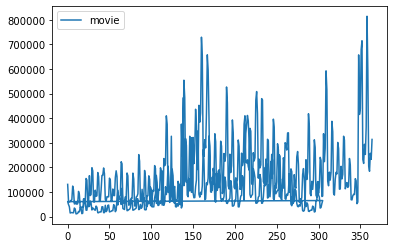

In [259]:
mov=pd.concat([mov20,mov21])
mov.plot()

# 상관분석 에 필요한 데이터

In [39]:
# mov=pd.concat([mov20,mov21])
# cov=pd.concat([co20,co21])

In [237]:
cov20=co20[["month","covid"]]
cov21=co21[["month","covid"]]

In [238]:
cov20

,month,covid
0,03,586.0
1,03,0.0
2,03,0.0
3,03,516.0
4,03,438.0
...,...,...
301,12,970.0
302,12,808.0
303,12,1046.0
304,12,1050.0


In [239]:
# co20 만들기
mar20=[]
apr20=[]
may20=[]
jun20=[]
jul20=[]
aug20=[]
sep20=[]
oct20=[]
nov20=[]
dec20=[]
for i in range(306):
    if cov20["month"][i]=="12":
        dec20.append(cov20.loc[i][1])
    if cov20["month"][i]=="11":
        nov20.append(cov20.loc[i][1])
    if cov20["month"][i]=="10":
        oct20.append(cov20.loc[i][1])
    if cov20["month"][i]=="09":
        sep20.append(cov20.loc[i][1])
    if cov20["month"][i]=="08":
        aug20.append(cov20.loc[i][1])
    if cov20["month"][i]=="07":
        jul20.append(cov20.loc[i][1])
    if cov20["month"][i]=="06":
        jun20.append(cov20.loc[i][1])
    if cov20["month"][i]=="05":
        may20.append(cov20.loc[i][1])
    if cov20["month"][i]=="04":
        apr20.append(cov20.loc[i][1])
    if cov20["month"][i]=="03":
        mar20.append(cov20.loc[i][1])

In [240]:
jan21=[]
feb21=[]
mar21=[]
apr21=[]
may21=[]
jun21=[]
jul21=[]
aug21=[]
sep21=[]
oct21=[]
nov21=[]
dec21=[]
for i in range(364):
    if cov21["month"][i]=="12":
        dec21.append(cov21.loc[i][1])
    if cov21["month"][i]=="11":
        nov21.append(cov21.loc[i][1])
    if cov21["month"][i]=="10":
        oct21.append(cov21.loc[i][1])
    if cov21["month"][i]=="09":
        sep21.append(cov21.loc[i][1])
    if cov21["month"][i]=="08":
        aug21.append(cov21.loc[i][1])
    if cov21["month"][i]=="07":
        jul21.append(cov21.loc[i][1])
    if cov21["month"][i]=="06":
        jun21.append(cov21.loc[i][1])
    if cov21["month"][i]=="05":
        may21.append(cov21.loc[i][1])
    if cov21["month"][i]=="04":
        apr21.append(cov21.loc[i][1])
    if cov21["month"][i]=="03":
        mar21.append(cov21.loc[i][1])
    if cov21["month"][i]=="02":
        feb21.append(cov21.loc[i][1])
    if cov21["month"][i]=="01":
        jan21.append(cov21.loc[i][1])

In [241]:
mar20=pd.DataFrame(mar20)
mar20=mar20.reset_index(drop=True)
mar20.columns=["mar20"]

apr20=pd.DataFrame(apr20)
apr20=apr20.reset_index(drop=True)
apr20.columns=["apr20"]

may20=pd.DataFrame(may20)
may20=may20.reset_index(drop=True)
may20.columns=["may20"]

jun20=pd.DataFrame(jun20)
jun20=jun20.reset_index(drop=True)
jun20.columns=["jun20"]

jul20=pd.DataFrame(jul20)
jul20=jul20.reset_index(drop=True)
jul20.columns=["jul20"]

aug20=pd.DataFrame(aug20)
aug20=aug20.reset_index(drop=True)
aug20.columns=["aug20"]

sep20=pd.DataFrame(sep20)
sep20=sep20.reset_index(drop=True)
sep20.columns=["sep20"]

oct20=pd.DataFrame(oct20)
oct20=oct20.reset_index(drop=True)
oct20.columns=["oct20"]

nov20=pd.DataFrame(nov20)
nov20=nov20.reset_index(drop=True)
nov20.columns=["nov20"]

dec20=pd.DataFrame(dec20)
dec20=dec20.reset_index(drop=True)
dec20.columns=["dec20"]

In [242]:
jan21=pd.DataFrame(jan21)
jan21=jan21.reset_index(drop=True)
jan21.columns=["jan21"]

feb21=pd.DataFrame(feb21)
feb21=feb21.reset_index(drop=True)
feb21.columns=["feb21"]

mar21=pd.DataFrame(mar21)
mar21=mar21.reset_index(drop=True)
mar21.columns=["mar21"]

apr21=pd.DataFrame(apr21)
apr21=apr21.reset_index(drop=True)
apr21.columns=["apr21"]

may21=pd.DataFrame(may21)
may21=may21.reset_index(drop=True)
may21.columns=["may21"]

jun21=pd.DataFrame(jun21)
jun21=jun21.reset_index(drop=True)
jun21.columns=["jun21"]

jul21=pd.DataFrame(jul21)
jul21=jul21.reset_index(drop=True)
jul21.columns=["jul21"]

aug21=pd.DataFrame(aug21)
aug21=aug21.reset_index(drop=True)
aug21.columns=["aug21"]

sep21=pd.DataFrame(sep21)
sep21=sep21.reset_index(drop=True)
sep21.columns=["sep21"]

oct21=pd.DataFrame(oct21)
oct21=oct21.reset_index(drop=True)
oct21.columns=["oct21"]

nov21=pd.DataFrame(nov21)
nov21=nov21.reset_index(drop=True)
nov21.columns=["nov21"]

dec21=pd.DataFrame(dec21)
dec21=dec21.reset_index(drop=True)
dec21.columns=["dec21"]

In [243]:
data20=pd.concat([mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20],axis=1)
data21=pd.concat([jan21,feb21,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21],axis=1)

In [244]:
data21.to_csv("C:\\sm\\mid_project\\data\\21년코로나상관분석할데이터.csv")

In [195]:
data_covid = pd.concat([data20,data21],axis=1)

In [196]:
data_covid

,mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,...,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21
0,586.0,101.0,9.0,35.0,51.0,31.0,235.0,77.0,124.0,451.0,...,355.0,551.0,627.0,459.0,762.0,1442.0,2025.0,2486.0,1686.0,5123.0
1,0.0,89.0,6.0,38.0,54.0,30.0,267.0,63.0,97.0,511.0,...,344.0,558.0,606.0,677.0,826.0,1219.0,1961.0,2248.0,1589.0,5266.0
2,0.0,86.0,13.0,49.0,63.0,23.0,195.0,75.0,75.0,540.0,...,444.0,543.0,488.0,681.0,794.0,1202.0,1709.0,2086.0,2667.0,4944.0
3,516.0,94.0,8.0,39.0,63.0,34.0,198.0,64.0,118.0,629.0,...,424.0,543.0,541.0,695.0,743.0,1725.0,1804.0,1673.0,2482.0,5352.0
4,438.0,81.0,3.0,51.0,61.0,33.0,168.0,73.0,125.0,583.0,...,398.0,473.0,676.0,744.0,711.0,1776.0,1490.0,1575.0,2344.0,5128.0
5,518.0,47.0,2.0,39.0,48.0,43.0,167.0,75.0,145.0,631.0,...,418.0,478.0,574.0,39.0,746.0,1704.0,1375.0,2028.0,2248.0,4325.0
6,483.0,47.0,4.0,57.0,44.0,20.0,119.0,114.0,89.0,615.0,...,416.0,668.0,525.0,485.0,1212.0,1823.0,1597.0,2427.0,2224.0,4954.0
7,367.0,53.0,12.0,38.0,63.0,43.0,136.0,69.0,143.0,594.0,...,346.0,700.0,701.0,454.0,1275.0,1729.0,2050.0,2176.0,1760.0,7175.0
8,248.0,39.0,18.0,38.0,50.0,36.0,156.0,54.0,126.0,686.0,...,446.0,671.0,564.0,602.0,1316.0,1492.0,2049.0,1953.0,1715.0,7102.0
9,131.0,27.0,34.0,50.0,45.0,28.0,155.0,72.0,100.0,682.0,...,470.0,677.0,463.0,611.0,39.0,1540.0,1892.0,1594.0,2425.0,7022.0


## (2) 영화 관객

In [245]:
mov20=mov20[["month","movie"]]
mov21=mov21[["month","movie"]]

In [246]:
mov21

,month,movie
0,01,60747
1,01,49018
2,01,40186
3,01,14518
4,01,15741
...,...,...
360,12,205300
361,12,184211
362,12,257281
363,12,232871


In [247]:
# mov20 만들기
mar20=[]
apr20=[]
may20=[]
jun20=[]
jul20=[]
aug20=[]
sep20=[]
oct20=[]
nov20=[]
dec20=[]
for i in range(306):
    if mov20["month"][i]=="12":
        dec20.append(mov20.loc[i][1])
    if mov20["month"][i]=="11":
        nov20.append(mov20.loc[i][1])
    if mov20["month"][i]=="10":
        oct20.append(mov20.loc[i][1])
    if mov20["month"][i]=="09":
        sep20.append(mov20.loc[i][1])
    if mov20["month"][i]=="08":
        aug20.append(mov20.loc[i][1])
    if mov20["month"][i]=="07":
        jul20.append(mov20.loc[i][1])
    if mov20["month"][i]=="06":
        jun20.append(mov20.loc[i][1])
    if mov20["month"][i]=="05":
        may20.append(mov20.loc[i][1])
    if mov20["month"][i]=="04":
        apr20.append(mov20.loc[i][1])
    if mov20["month"][i]=="03":
        mar20.append(mov20.loc[i][1])

In [248]:
jan21=[]
feb21=[]
mar21=[]
apr21=[]
may21=[]
jun21=[]
jul21=[]
aug21=[]
sep21=[]
oct21=[]
nov21=[]
dec21=[]
for i in range(365):
    if mov21["month"][i]=="12":
        dec21.append(mov21.loc[i][1])
    if mov21["month"][i]=="11":
        nov21.append(mov21.loc[i][1])
    if mov21["month"][i]=="10":
        oct21.append(mov21.loc[i][1])
    if mov21["month"][i]=="09":
        sep21.append(mov21.loc[i][1])
    if mov21["month"][i]=="08":
        aug21.append(mov21.loc[i][1])
    if mov21["month"][i]=="07":
        jul21.append(mov21.loc[i][1])
    if mov21["month"][i]=="06":
        jun21.append(mov21.loc[i][1])
    if mov21["month"][i]=="05":
        may21.append(mov21.loc[i][1])
    if mov21["month"][i]=="04":
        apr21.append(mov21.loc[i][1])
    if mov21["month"][i]=="03":
        mar21.append(mov21.loc[i][1])
    if mov21["month"][i]=="02":
        feb21.append(mov21.loc[i][1])
    if mov21["month"][i]=="01":
        jan21.append(mov21.loc[i][1])

In [249]:
mar20=pd.DataFrame(mar20)
mar20=mar20.reset_index(drop=True)
mar20.columns=["mar20"]

apr20=pd.DataFrame(apr20)
apr20=apr20.reset_index(drop=True)
apr20.columns=["apr20"]

may20=pd.DataFrame(may20)
may20=may20.reset_index(drop=True)
may20.columns=["may20"]

jun20=pd.DataFrame(jun20)
jun20=jun20.reset_index(drop=True)
jun20.columns=["jun20"]

jul20=pd.DataFrame(jul20)
jul20=jul20.reset_index(drop=True)
jul20.columns=["jul20"]

aug20=pd.DataFrame(aug20)
aug20=aug20.reset_index(drop=True)
aug20.columns=["aug20"]

sep20=pd.DataFrame(sep20)
sep20=sep20.reset_index(drop=True)
sep20.columns=["sep20"]

oct20=pd.DataFrame(oct20)
oct20=oct20.reset_index(drop=True)
oct20.columns=["oct20"]

nov20=pd.DataFrame(nov20)
nov20=nov20.reset_index(drop=True)
nov20.columns=["nov20"]

dec20=pd.DataFrame(dec20)
dec20=dec20.reset_index(drop=True)
dec20.columns=["dec20"]

In [250]:
jan21=pd.DataFrame(jan21)
jan21=jan21.reset_index(drop=True)
jan21.columns=["jan21"]

feb21=pd.DataFrame(feb21)
feb21=feb21.reset_index(drop=True)
feb21.columns=["feb21"]

mar21=pd.DataFrame(mar21)
mar21=mar21.reset_index(drop=True)
mar21.columns=["mar21"]

apr21=pd.DataFrame(apr21)
apr21=apr21.reset_index(drop=True)
apr21.columns=["apr21"]

may21=pd.DataFrame(may21)
may21=may21.reset_index(drop=True)
may21.columns=["may21"]

jun21=pd.DataFrame(jun21)
jun21=jun21.reset_index(drop=True)
jun21.columns=["jun21"]

jul21=pd.DataFrame(jul21)
jul21=jul21.reset_index(drop=True)
jul21.columns=["jul21"]

aug21=pd.DataFrame(aug21)
aug21=aug21.reset_index(drop=True)
aug21.columns=["aug21"]

sep21=pd.DataFrame(sep21)
sep21=sep21.reset_index(drop=True)
sep21.columns=["sep21"]

oct21=pd.DataFrame(oct21)
oct21=oct21.reset_index(drop=True)
oct21.columns=["oct21"]

nov21=pd.DataFrame(nov21)
nov21=nov21.reset_index(drop=True)
nov21.columns=["nov21"]

dec21=pd.DataFrame(dec21)
dec21=dec21.reset_index(drop=True)
dec21.columns=["dec21"]

In [251]:
data20=pd.concat([mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20],axis=1)
data21=pd.concat([jan21,feb21,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21],axis=1)

In [175]:
data_movie = pd.concat([data20,data21],axis=1)

In [176]:
data_movie

,mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,...,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21
0,130900,32390.0,70147,28428.0,94073,436480,64780.0,372156,228647.0,40854,...,162608,65824.0,204635,76466.0,118656,409792,224163.0,115591,81511.0,138340
1,63441,27536.0,74721,27218.0,83832,369037,72023.0,411306,72249.0,40058,...,47070,68983.0,159691,77178.0,164475,225973,155882.0,242601,83333.0,118661
2,60084,25690.0,74923,28185.0,93356,192059,69075.0,389451,67671.0,48299,...,77666,187487.0,57398,121954.0,306639,217963,173685.0,264556,337027.0,123887
3,61515,42628.0,49275,84157.0,192541,191830,82074.0,299083,125420.0,42529,...,79700,160755.0,77940,148388.0,286630,230747,396214.0,212283,223146.0,236162
4,65692,37548.0,114696,84798.0,166229,452463,160869.0,89942,114139.0,68470,...,87069,43160.0,326744,347457.0,93561,203358,364069.0,58414,277533.0,209509
5,68790,15725.0,32685,165677.0,56653,384029,141700.0,78047,141729.0,64329,...,222971,40889.0,61494,307184.0,109637,189014,110139.0,72805,592547.0,68607
6,123977,15429.0,30920,151396.0,55184,421208,54559.0,86065,296003.0,24014,...,214664,56611.0,69404,91282.0,256487,358920,92777.0,62562,515982.0,67631
7,106888,18634.0,28718,46276.0,67422,729498,53254.0,89690,271064.0,21756,...,58559,52712.0,113036,78851.0,224746,347158,100032.0,77907,143154.0,84529
8,51615,18514.0,80420,43091.0,63649,654596,62622.0,194953,82144.0,24744,...,55426,60001.0,122405,98863.0,249764,135384,106840.0,170800,125358.0,90725
9,51426,18992.0,69039,74653.0,70847,265688,68788.0,180855,79844.0,48472,...,58456,119307.0,40077,89855.0,527019,129620,110278.0,195155,180743.0,89414


In [252]:
data21.to_csv("C:\\sm\\mid_project\\data\\21년영화상관분석할데이터.csv")

In [197]:
data_movie.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한movie.csv")
data_covid.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한covid.csv")

In [198]:
data_movie

,mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,...,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21
0,130900,32390.0,70147,28428.0,94073,436480,64780.0,372156,228647.0,40854,...,162608,65824.0,204635,76466.0,118656,409792,224163.0,115591,81511.0,138340
1,63441,27536.0,74721,27218.0,83832,369037,72023.0,411306,72249.0,40058,...,47070,68983.0,159691,77178.0,164475,225973,155882.0,242601,83333.0,118661
2,60084,25690.0,74923,28185.0,93356,192059,69075.0,389451,67671.0,48299,...,77666,187487.0,57398,121954.0,306639,217963,173685.0,264556,337027.0,123887
3,61515,42628.0,49275,84157.0,192541,191830,82074.0,299083,125420.0,42529,...,79700,160755.0,77940,148388.0,286630,230747,396214.0,212283,223146.0,236162
4,65692,37548.0,114696,84798.0,166229,452463,160869.0,89942,114139.0,68470,...,87069,43160.0,326744,347457.0,93561,203358,364069.0,58414,277533.0,209509
5,68790,15725.0,32685,165677.0,56653,384029,141700.0,78047,141729.0,64329,...,222971,40889.0,61494,307184.0,109637,189014,110139.0,72805,592547.0,68607
6,123977,15429.0,30920,151396.0,55184,421208,54559.0,86065,296003.0,24014,...,214664,56611.0,69404,91282.0,256487,358920,92777.0,62562,515982.0,67631
7,106888,18634.0,28718,46276.0,67422,729498,53254.0,89690,271064.0,21756,...,58559,52712.0,113036,78851.0,224746,347158,100032.0,77907,143154.0,84529
8,51615,18514.0,80420,43091.0,63649,654596,62622.0,194953,82144.0,24744,...,55426,60001.0,122405,98863.0,249764,135384,106840.0,170800,125358.0,90725
9,51426,18992.0,69039,74653.0,70847,265688,68788.0,180855,79844.0,48472,...,58456,119307.0,40077,89855.0,527019,129620,110278.0,195155,180743.0,89414


In [199]:
from sklearn.preprocessing import minmax_scale

a= minmax_scale(data_movie)
mov=pd.DataFrame(a)

In [200]:
mov.columns=data_movie.columns

In [201]:
from sklearn.preprocessing import minmax_scale

a= minmax_scale(data_covid)
cov=pd.DataFrame(a)

In [202]:
cov.columns=data_covid.columns

In [213]:
mov.isnull().sum()

mar20    0
apr20    1
may20    0
jun20    1
jul20    0
aug20    0
sep20    1
oct20    0
nov20    1
dec20    0
jan21    0
feb21    3
mar21    0
apr21    1
may21    0
jun21    1
jul21    0
aug21    0
sep21    1
oct21    0
nov21    1
dec21    0
dtype: int64

In [212]:
cov.isnull().sum()

mar20    0
apr20    1
may20    0
jun20    1
jul20    0
aug20    0
sep20    1
oct20    0
nov20    1
dec20    0
jan21    0
feb21    3
mar21    0
apr21    1
may21    0
jun21    1
jul21    0
aug21    0
sep21    1
oct21    0
nov21    1
dec21    1
dtype: int64

In [204]:
mov.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한movie정규화.csv")
cov.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한covid정규화.csv")

In [214]:
mov

,mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,...,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21
0,1.000000,0.185313,0.508517,0.003164,0.089564,0.563240,0.085577,0.890452,0.732655,0.181045,...,0.571623,0.180340,0.378985,0.025885,0.057895,0.760105,0.499709,0.178324,0.000000,0.112740
1,0.357698,0.132279,0.558979,0.000000,0.069319,0.462712,0.109842,1.000000,0.111890,0.174584,...,0.018485,0.201622,0.278602,0.028444,0.163601,0.313226,0.301161,0.523235,0.003565,0.086925
2,0.325735,0.112110,0.561208,0.002529,0.088146,0.198916,0.099966,0.938846,0.093719,0.241477,...,0.164963,1.000000,0.050131,0.189398,0.491577,0.293753,0.352929,0.582856,0.499996,0.093781
3,0.339360,0.297172,0.278248,0.148887,0.284221,0.198575,0.143513,0.685983,0.322933,0.194641,...,0.174701,0.819903,0.096011,0.284419,0.445416,0.324832,1.000000,0.440903,0.277153,0.241061
4,0.379131,0.241669,1.000000,0.150563,0.232206,0.587063,0.407481,0.100775,0.278157,0.405208,...,0.209980,0.027649,0.651715,1.000000,0.000000,0.258247,0.906529,0.023053,0.383578,0.206098
5,0.408628,0.003234,0.095221,0.362049,0.015590,0.485059,0.343264,0.067491,0.387666,0.371595,...,0.860612,0.012349,0.059279,0.855233,0.037088,0.223375,0.168150,0.062133,1.000000,0.021265
6,0.934084,0.000000,0.075749,0.324706,0.012686,0.540476,0.051336,0.089927,1.000000,0.044352,...,0.820842,0.118270,0.076946,0.079143,0.375875,0.636431,0.117664,0.034317,0.850177,0.019985
7,0.771373,0.035017,0.051455,0.049834,0.036878,1.000000,0.046965,0.100070,0.901014,0.026024,...,0.073488,0.092002,0.174398,0.034458,0.302648,0.607837,0.138760,0.075988,0.120624,0.042152
8,0.245099,0.033706,0.621853,0.041505,0.029420,0.888354,0.078348,0.394612,0.151165,0.050278,...,0.058489,0.141109,0.195324,0.106394,0.360365,0.092996,0.158557,0.328251,0.085800,0.050279
9,0.243299,0.038929,0.496293,0.124035,0.043649,0.308665,0.099004,0.355164,0.142036,0.242881,...,0.072995,0.540662,0.011444,0.074014,1.000000,0.078984,0.168554,0.394390,0.194178,0.048560
